#**TASK NAME : PREDICTION USING SUPERVISED ML**


**PREPARED BY : KIRTHIKAA.M**

**TASK DESCRIPTION : Predicting the percentage of marks a student can score based on the number of study hours utilised.**

**DATA : The number of hours studied and the scores of 25 students**

#**TASK EXECUTION**

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics   
import matplotlib.pyplot as plt

**CHECKING OUT THE INPUT DATA**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**VISUALISING THE RELATIONSHIP OF THE VARIABLES**

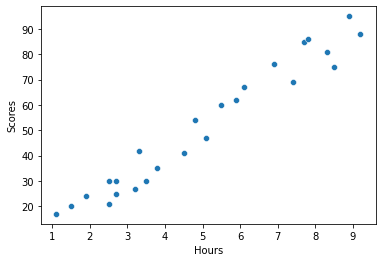

In [5]:
sns.scatterplot(data=df,x=df.Hours,y=df.Scores)

**As seen from the graph, the variables have a positive linear relationship between them and thus we can proceed forward to use the linear regression model to make predictions from the data.**

**TRAINING A LINEAR REGRESSION MODEL**

**We have to split the data into two variables X and y with X being the independent or input or predictor variable(number of study hours) and y being the dependent or output or predicted variable(percentage of marks).**

In [6]:
X = df[['Hours']]
y = df['Scores']
print(X.shape)
print(y.shape)

(25, 1)
(25,)


**SPLITTING THE DATA INTO TRAIN AND TEST SETS**

In [7]:
# Splitting the data such that 80 % of data is used for training and 20 % is used for testing.
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=101)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


**CREATING AND TRAINING THE MODEL**

In [9]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**VISUALISING THE REGRESSION LINE PREDICTED BY THE MODEL**

In [10]:
print(lr.intercept_)

2.5121292983200902


In [11]:
print(lr.coef_)

[9.73330705]


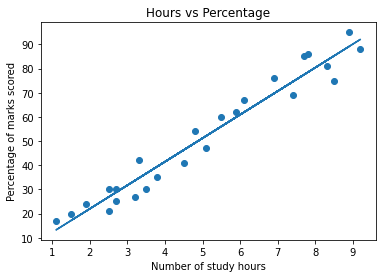

In [12]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Number of study hours')  
plt.ylabel('Percentage of marks scored') 
plt.show()

**MAKING PREDICTIONS FROM THE MODEL**

In [18]:
y_pred = lr.predict(x_test)
df1 = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
df1

,Actual values,Predicted values
16,30,26.845397
10,85,77.458594
22,35,39.498696
19,69,74.538601
7,60,56.045318


**EVALUATING THE MODEL**

In [ ]:
lr.score(x_test,y_test)

0.9696064122424448

**This value represents the coefficient of determination which is a statistical measure of how close the data is to the fitted regression line. The value shows that it is a good fit.**

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.370717604368028


**Mean Absolute Error gives the absolute difference between the actual data and the model’s predictions. This MAE suggests that the model is good at predcition.**

**MAKING THE FINAL PREDICTIONS**

In [ ]:
score = lr.predict([[9.25]])
print('The score is {}'.format(score[0]))


The score is 93.12797164852307


**If a student studies for 9.25 hours in a day, the score which the student is expected to get is 93.13%.**